# Hotel Booking EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#we will store the data in df data frame and read the data

In [3]:
df = pd.read_csv('C:/Users/Swapnil/Desktop/Datasets/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Checking for the null values


In [7]:
df.isnull

<bound method DataFrame.isnull of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df['country'].mode()

0    PRT
Name: country, dtype: object

In [10]:
df['country'] = df['country'].fillna("PRT")

# Agent is integer data type

if there is outlier in agent then we replace the null values by median

if there is no outlier in agent then we replace the null values by mean



In [11]:
Q1 = df['agent'].quantile(.25)
Q3 = df['agent'].quantile(.75)

IQR = Q3-Q1
IQR

220.0

In [12]:
# now we will look at the left and right value

In [13]:
vr = Q1-(1.5*IQR)
vl = Q3+(1.5*IQR)

vr,vl

(-321.0, 559.0)

In [14]:
df['agent'].describe()

count    103050.000000
mean         86.693382
std         110.774548
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

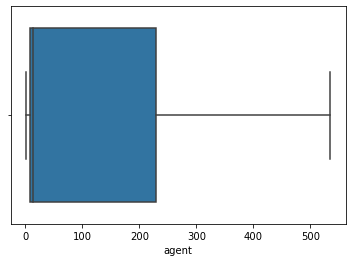

In [15]:
sns.boxplot(df['agent'])
plt.show

In [16]:
df['agent'] = df['agent'].replace(np.nan,df['agent'].mean())

In [17]:
# we have to drop the company column because it has 112593 null values if we change the values it will increase the biasness

In [18]:
df = df.drop('company' , axis=1)

# now we will work on the children column

In [19]:
df['children'].describe()

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

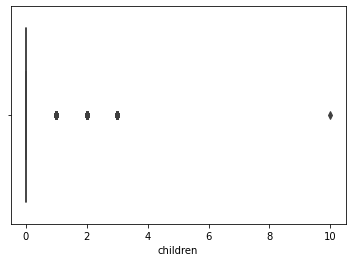

In [20]:
sns.boxplot(df['children'])
plt.show

In [21]:
# no outlier is present in this we replace the null values with mean


In [22]:
df['children'] = df['children'].replace(np.nan, df['children'].mean())

In [23]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [24]:
df['total_stay'] = df['stays_in_weekend_nights']+ df['stays_in_week_nights']

In [26]:
df['total_stay'].value_counts(sort=True)

2     27643
3     27076
1     21020
4     17383
7      8655
5      7784
6      3857
8      1161
10     1139
14      916
9       841
0       715
11      396
12      223
13      142
15       75
21       71
16       40
25       37
18       35
28       35
19       22
17       20
29       14
20       14
22       14
30       13
23        8
24        6
26        6
27        5
35        5
42        4
33        3
56        2
34        1
57        1
49        1
48        1
69        1
38        1
45        1
60        1
46        1
43        1
Name: total_stay, dtype: int64

In [77]:
df['total_stay'].mean()

3.4279001591423066

from above we can conclude that the average stay in hotel is about 4 days

In [27]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [34]:
dff = df[['hotel' , "total_of_special_requests"]]
total_special_requests = dff.groupby('hotel')['total_of_special_requests'].sum()

In [35]:
total_special_requests

hotel
City Hotel      43387
Resort Hotel    24828
Name: total_of_special_requests, dtype: int64

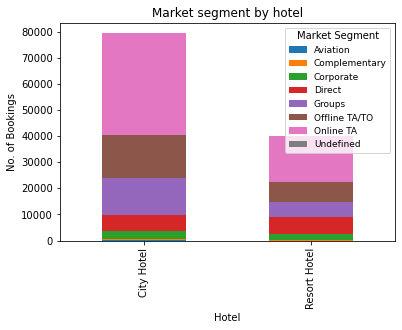

In [50]:
# filter the relevent column

dfc = df[['hotel' ,'market_segment' ]]

#group the data by market segment and hotel

grouped = df.groupby(['hotel' ,'market_segment']).size().reset_index(name = 'count')

#pivot table to show the market segment counts by hotel

pivoted = pd.pivot_table(grouped , values = 'count'  , index = 'hotel' , columns = 'market_segment')

#create a stacked bar plot

pivoted.plot(kind = 'bar' , stacked = True)

plt.title('Market segment by hotel')
plt.xlabel('Hotel')
plt.ylabel('No. of Bookings')
plt.legend(title = 'Market Segment' , prop = {'size' : 9})
plt.show()

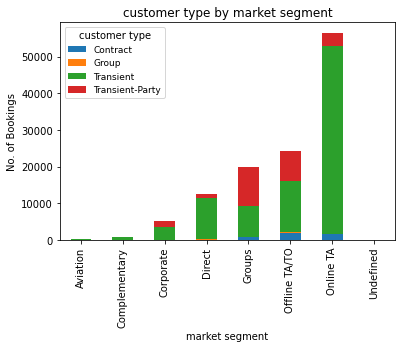

In [51]:
# filter the relevent column

dfc = df[[ 'market_segment' , 'customer_type' ]]

#group the data by market segment and customer_type

grouped = df.groupby(['market_segment' , 'customer_type']).size().reset_index(name = 'count')

#pivot table to show the market segment counts by customer_type

pivoted = pd.pivot_table(grouped , values = 'count'  , index = 'market_segment' , columns = 'customer_type')

#create a stacked bar plot

pivoted.plot(kind = 'bar' , stacked = True)

plt.title('customer type by market segment')
plt.xlabel('market segment')
plt.ylabel('No. of Bookings')
plt.legend(title = 'customer type' , prop = {'size' : 9})
plt.show()

# creating data frame with all numerical variables - df_num
#creating data frame with all Catagorical variables - df_cat

In [53]:
df_num = df.select_dtypes(exclude = 'object')
df_cat = df.select_dtypes(include = 'object')

In [54]:
df_num.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,86.693382,0,0.0,0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,86.693382,0,0.0,0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,86.693382,0,75.0,0,0,1
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.000000,0,75.0,0,0,1
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.000000,0,98.0,0,1,2


In [55]:
#melting all numerical data together with the help of pd.melt function


In [56]:
melted_data = pd.melt(df_num)

In [57]:
melted_data.head()

,variable,value
0,is_canceled,0.0
1,is_canceled,0.0
2,is_canceled,0.0
3,is_canceled,0.0
4,is_canceled,0.0


creating histogram for all the melted data

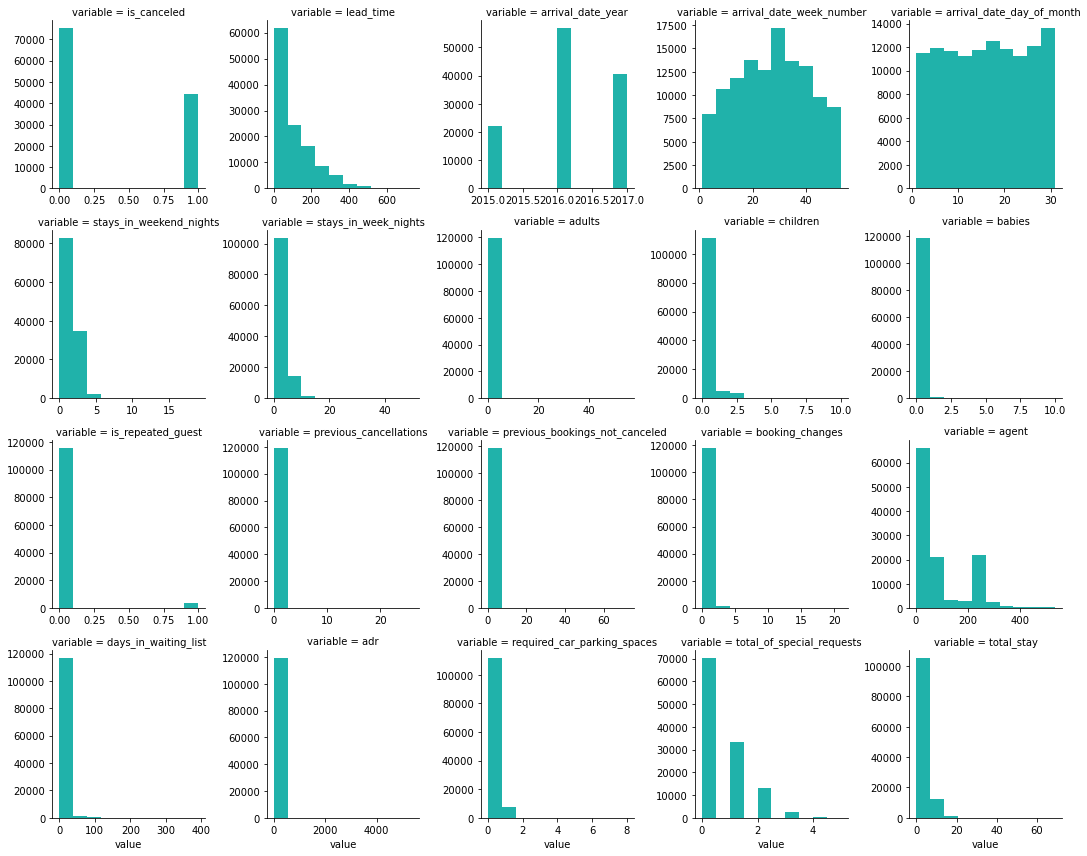

In [58]:
grid = sns.FacetGrid(melted_data , col = 'variable' , col_wrap = 5 , sharex = False , sharey = False)
grid = grid.map(plt.hist , 'value' , color = 'lightseagreen')

1. Around 45000 of the customers cancelled their booking. (0 indicates no and 1 indicates yes)

2. The graph is left skewed and shows that majority of the customers have lead time ranging from 0-

200

3. Majority of the customers arrived in the year 2016.

4. Number of customers arriving at week 30 was the highest.

5. The number of customers arriving towards the end of the month are the highest.

6. Higher number of customers stay for 0-4 weekend nights.

7. Higher number of customers stay for 0-10 weekday nights.

8. For all customers, number fo adults are less than 5.

9. For majority customers,number of children range from 0-1.

10. For all customers, number of children range from 0-1

11. No customers cancelled their previous bookings.

12. The value of previous bookings not cancelled for all customers is zero.

13. Majority of the customers did not make any booking changes post making the booking.

14. Around 20000 customers used an agent to make the booking but majority did not.

15. Majority of the customers did not have to be in the waiting list to make their booking.

16. The average daily rate (ADR) ranges between 0-1000 for most customers.

In [59]:
correlation = df_num.corr()
correlation

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.077992,0.054186,0.047557,-0.195498,-0.234658,0.017779
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037621,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.065283,0.170084,-0.063077,-0.116451,-0.095712,0.157167
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054622,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.058851,-0.056497,0.197580,-0.013684,0.108531,0.031438
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.028306,0.022933,0.075791,0.001920,0.026149,0.018719
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001384,0.022728,0.030245,0.008683,0.003062,-0.027408
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045792,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.131451,-0.054151,0.049342,-0.018554,0.072671,0.762790
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044202,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.169218,-0.002020,0.065237,-0.024859,0.068192,0.941005
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030446,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.028033,-0.008283,0.230641,0.014785,0.122884,0.105249
children,0.005048,-0.037621,0.054622,0.005518,0.014544,0.045792,0.044202,0.030446,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.039422,-0.033273,0.324841,0.056253,0.081743,0.050863
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.033472,-0.010621,0.029186,0.037383,0.097889,0.022283


<AxesSubplot:>

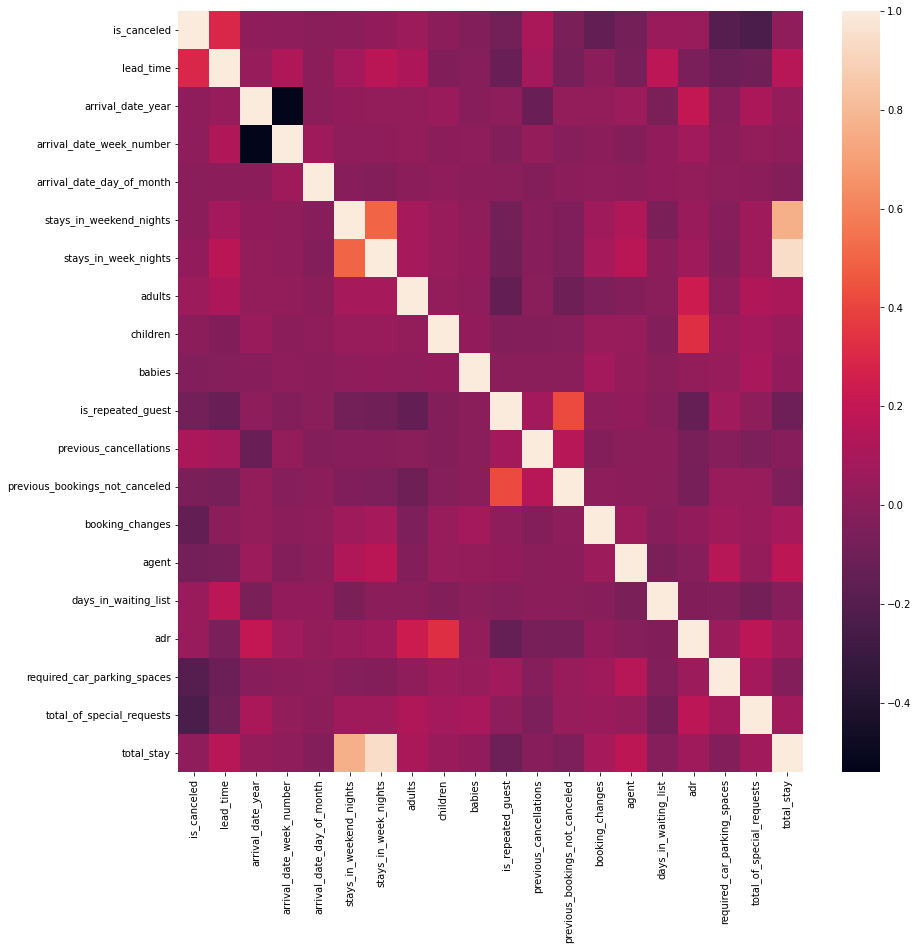

In [61]:
plt.figure(figsize=(14,14))
sns.heatmap(correlation)

In [69]:
# Top countries from where hotel is receiving guest

In [63]:
df_topcountry = df['country'].value_counts().head(10)

In [64]:
df_topcountry

PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

<AxesSubplot:title={'center':'Top countries from where hotel is receiving guest'}, ylabel='country'>

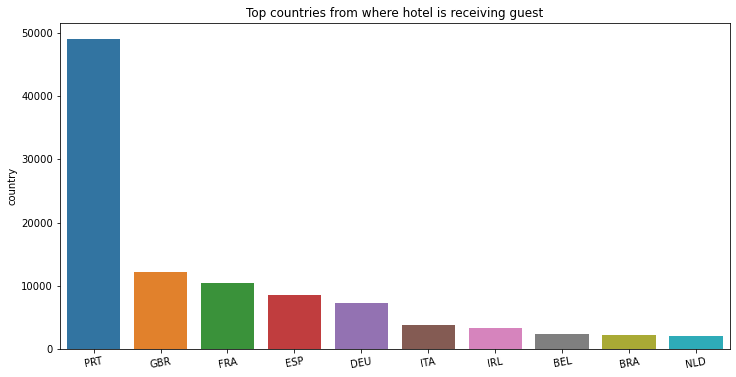

In [71]:
plt.figure(figsize = (12,6))
plt.xticks(rotation = 10)
plt.title("Top countries from where hotel is receiving guest")
sns.barplot(x=df_topcountry.index , y = df_topcountry)

In [74]:
#average daily rate according to month and hotel type

Text(0.5, 1.0, 'average daily rate according to month and hotel type')

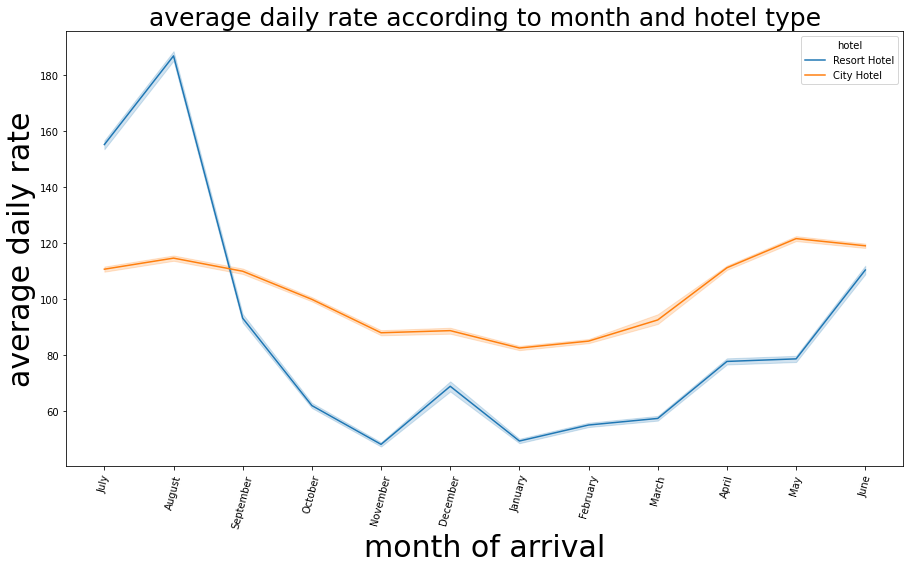

In [73]:
plt.figure(figsize = (15,8))
sns.lineplot( data = df , x = 'arrival_date_month' , y = 'adr' , hue = 'hotel')
plt.xlabel('month of arrival' , fontsize = 30)
plt.xticks(rotation = 75)
plt.ylabel('average daily rate' , fontsize = 30)
plt.title('average daily rate according to month and hotel type' , fontsize = 25)

In [ ]:
#customer segment of booking

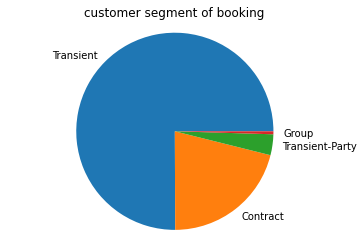

In [76]:
sizes = df['customer_type'].value_counts()
labels = df['customer_type'].unique()

plt.pie(sizes , labels = labels)

plt.title('customer segment of booking')
plt.axis('equal')
plt.show()

In [78]:
# we will show how many hotels are booked in each month

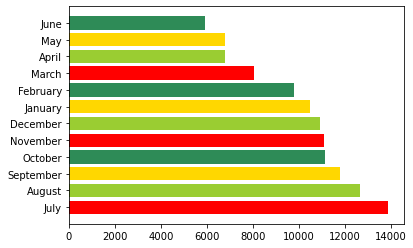

In [82]:
cat1=df['arrival_date_month'].unique()
val1 = df['arrival_date_month'].value_counts()
colors = ['red' , 'yellowgreen' , 'gold' , 'seagreen']
plt.barh(cat1 , val1 , color = colors )

plt.show()

from above we can observe that most of booking is in moth of july that means most of guest prefer travelling in the month of july